In [48]:
import glob

import matplotlib.pyplot as plt
import xarray as xr
import xclim as xc

## AGCD

In [4]:
infiles = sorted(glob.glob('/g/data/zv2/agcd/v1-0-3/tmax/mean/r005/01day/agcd_v1_tmax_mean_r005_daily_*.nc'))

In [15]:
ds = xr.open_mfdataset(infiles)
ds = ds.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds = ds.compute()

/jobfs/149701454.gadi-pbs/ipykernel_250587/1166600662.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds = xr.open_mfdataset(infiles)


In [18]:
tx90 = xc.core.calendar.percentile_doy(
    ds['tmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)

In [19]:
tx90 = tx90.compute()
tx90 = tx90.sel(percentiles=90)

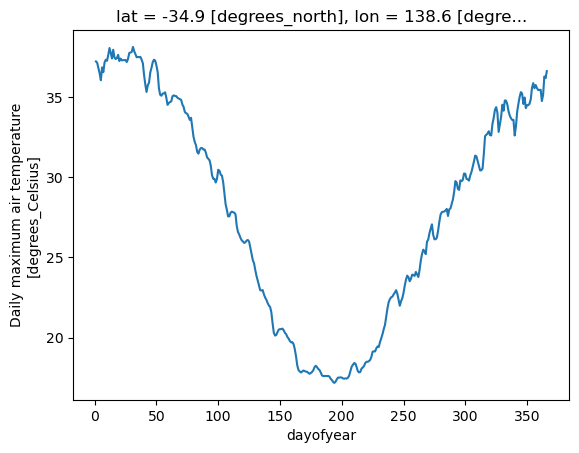

In [25]:
tx90.plot()

In [41]:
wsdi = xc.indicators.icclim.WSDI(
    tasmax=ds['tmax'],
    tasmax_per=tx90,
    freq='YS',
)   

In [42]:
wsdi

<xarray.DataArray 'WSDI' (time: 115)> Size: 920B
array([ 0.,  8.,  0.,  6., 14.,  0.,  0.,  0.,  8.,  0.,  0., 15.,  0.,
        0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  7.,  0.,  0.,  8.,  0.,
        9.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  0.,  0., 15.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0., 21.,  0.,  0., 17.,  0.,  0.,
        0.,  0.,  6.,  0.,  0., 15.,  8.,  0.,  0.,  6.,  0.,  0.,  6.,
        0.,  7.,  0.,  0.,  7.,  0.,  0., 13., 15.,  0.,  7.,  0.,  0.,
        9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.])
Coordinates:
    lat          float32 4B -34.9
    lon          float32 4B 138.6
    percentiles  int64 8B 90
  * time         (time) datetime64[ns] 920B 1910-01-01 1911-01-01 ... 2024-01-01
Attributes:
    units:          days
    cell_methods:   tasmax: time: maximum tasmax_per: time: maximum time: sum...
    history:        tasmax: \ntasmax_per: [2025-09-15 13:47:00] per: percenti...
    long_name:      Warm-spell duration index
    standard_name:  number_of_days_with_air_temperature_above_threshold
    description:    Annual number of days with at least 6 consecutive days wh...

In [45]:
wsdi_series = wsdi.to_series()
wsdi_series.index = wsdi_series.index.year

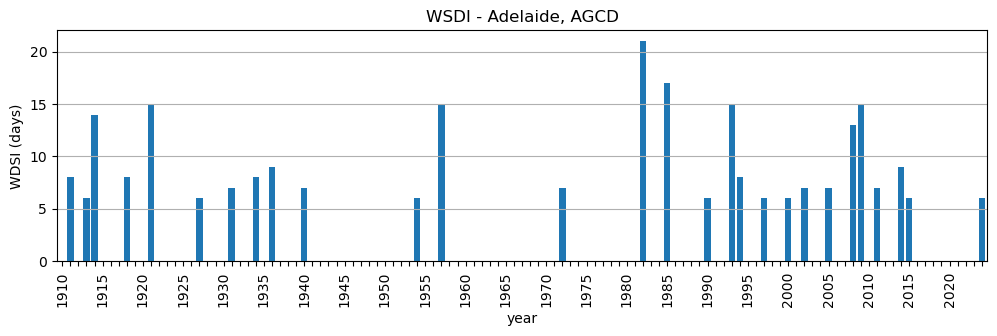

In [79]:
ax = wsdi_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, AGCD')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()

## CORDEX

In [61]:
hist_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/historical/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_historical_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [63]:
ssp370_files = sorted(glob.glob('/g/data/py18/BARPA/output/CMIP6/DD/AUS-15/BOM/ACCESS-CM2/ssp370/r4i1p1f1/BARPA-R/v1-r1/day/tasmax/latest/tasmax_AUS-15_ACCESS-CM2_ssp370_r4i1p1f1_BOM_BARPA-R_v1-r1_day_*.nc'))

In [64]:
cordex_files = hist_files + ssp370_files

In [65]:
ds_cordex = xr.open_mfdataset(cordex_files)
ds_cordex = ds_cordex.sel({'lat': -34.92, 'lon': 138.62}, method='nearest')
ds_cordex = ds_cordex.compute()
ds_cordex['tasmax'] = xc.core.units.convert_units_to(ds_cordex['tasmax'], 'degC')

/jobfs/149701454.gadi-pbs/ipykernel_250587/1814103595.py:1: FutureWarning: In a future version of xarray the default value for data_vars will change from data_vars='all' to data_vars=None. This is likely to lead to different results when multiple datasets have matching variables with overlapping values. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set data_vars explicitly.
  ds_cordex = xr.open_mfdataset(cordex_files)


In [72]:
tx90_cordex = xc.core.calendar.percentile_doy(
    ds_cordex['tasmax'].sel(time=slice('1950-01-01', '2014-12-31')),
    window=5,
    per=90
)
tx90_cordex_ = tx90_cordex.compute()
tx90_cordex = tx90_cordex.sel(percentiles=90)

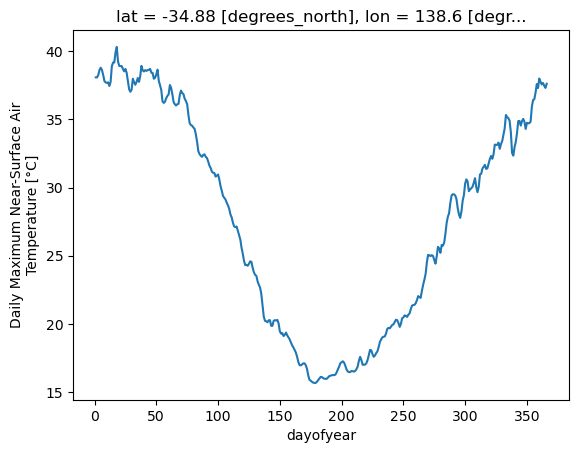

In [73]:
tx90_cordex.plot()

In [74]:
wsdi_cordex = xc.indicators.icclim.WSDI(
    tasmax=ds_cordex['tasmax'],
    tasmax_per=tx90_cordex,
    freq='YS',
)   

In [75]:
wsdi_cordex_series = wsdi_cordex.to_series()
wsdi_cordex_series.index = wsdi_cordex_series.index.year

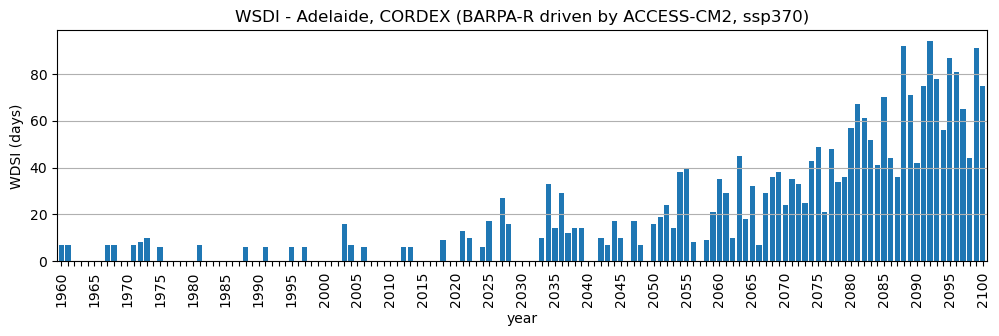

In [78]:
ax = wsdi_cordex_series.plot.bar(figsize=[12, 3], width=0.8)
ax.set_ylabel('WDSI (days)')
ax.set_xlabel('year')
ax.set_title('WSDI - Adelaide, CORDEX (BARPA-R driven by ACCESS-CM2, ssp370)')
plt.grid(axis='y')
for i, t in enumerate(ax.get_xticklabels()):
    if (i % 5) != 0:
        t.set_visible(False)
plt.show()